In [ ]:
!pip install pyspark
# !pip install graphframes
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!curl -L -o "/usr/local/lib/python3.7/dist-packages/pyspark/jars/graphframes-0.8.1-spark3.0-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
from pyspark.sql.functions import *
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf
# create a Spark session
conf = SparkConf().set("spark.ui.port", "4050").setExecutorEnv("memory", "4g").set("spark.driver.memory", "8g")

# create a Spark context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=spark.read.csv("train.csv", header=True).withColumn("label", col("label").cast("float"))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


TypeError: ignored

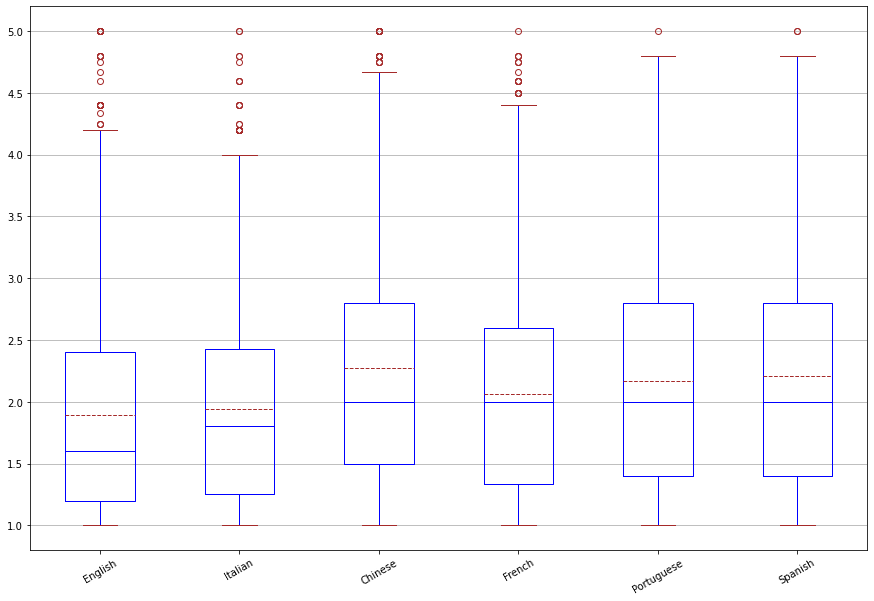

In [ ]:
from numpy.ma.core import sort
windowSpec  = Window.partitionBy("language").orderBy("label")
train2Pandas=train.toPandas()
train2Pandas['label']=train2Pandas['label'].astype('float')
mean1=train.agg(pyspark.sql.functions.mean("language").alias("mean")).collect()[0]["mean"]
c="blue"
cmean="brown"

grouped = train2Pandas.groupby(["language"])

df2 = pd.DataFrame({col:vals['label'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]

bp=df2.boxplot(notch =False,patch_artist =False,meanline =True,showmeans =True,
            boxprops=dict( color=c),
            capprops=dict(color=cmean),
            whiskerprops=dict(color=c),
            flierprops=dict(markeredgecolor=cmean),
            meanprops=dict(color=cmean),
            medianprops=dict(color=c),rot=30, return_type='dict',
                     grid=True,figsize=(15, 10))
plt.grid(axis='x')
plt.axhline(mean1, c=cmean, ls='-.', label="Global Mean")
plt.legend(frameon=False,loc='upper right')
plt.title("Dataset Analysis: Language Label Distribution", fontdict=dict(fontsize=20, color="blue"))
def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['caps', 'means']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%.3f' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=8, backgroundcolor="white")

add_values(bp, plt.axes())

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
windowSpec  = Window.partitionBy("language").orderBy("label")

from numpy.ma.core import sort
train2Pandas=train.toPandas()
train2Pandas['label']=train2Pandas['label'].astype('float')
mean1=train.agg(pyspark.sql.functions.mean("label").alias("mean")).collect()[0]["mean"]
c="blue"
cmean="brown"

grouped = train2Pandas.groupby(["language"])

df2 = pd.DataFrame({col:vals['label'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]

df2.boxplot(notch =False,patch_artist =False,meanline =True,showmeans =True,
            boxprops=dict( color=c),
            capprops=dict(color=cmean),
            whiskerprops=dict(color=c),
            flierprops=dict(markeredgecolor=cmean),
            meanprops=dict(color=cmean),
            medianprops=dict(color=c),rot=30,
                     grid=True,figsize=(15, 10)).grid(axis='x')
plt.axhline(mean1, c=cmean, ls='-.', label="Global Mean")
plt.legend(frameon=False,loc='upper right')
plt.title("Tennis Analysis: playerwise seconds before next point", fontdict=dict(fontsize=20, color="green"))

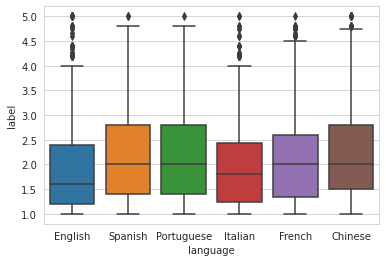

In [ ]:
# import seaborn library
import seaborn as sns
  
sns.boxplot(x = 'language',
            y = 'label', data = pd.read_csv("train.csv"), meanline=True )

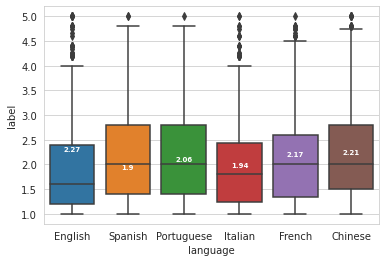

In [ ]:
sns.set_style("whitegrid")
train2Pandas = pd.read_csv("train.csv")
box_plot = sns.boxplot(x="language",y="label",data=train2Pandas)

medians = train2Pandas.groupby(['language'])['label'].mean().round(2)
vertical_offset = train2Pandas['label'].mean()*0.000001 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

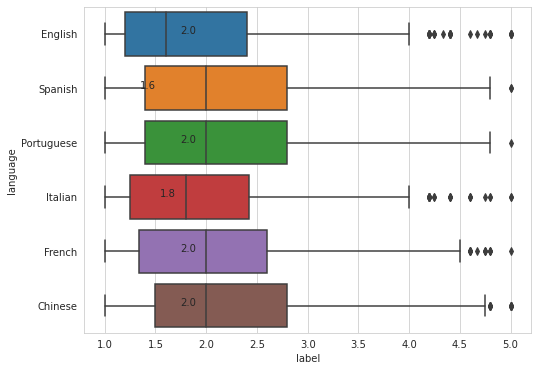

In [ ]:
plt.figure(figsize=(8,6))
box = sns.boxplot(x="label",y="language", orient='h', data=train2Pandas)
df1 = train2Pandas.groupby('language')['label'].agg(Min='min', Median='median', Max='max')
df1
# for i in range(len(df1.Min)):
#   box.annotate(str(df1.Min[i]), xy=(df1.Min[i]-0.1,i), ha='right')

for i in range(len(df1.Median)):
  box.annotate(str(df1.Median[i]), xy=(df1.Median[i]-0.1,i), ha='right')

# for i in range(len(df1.Max)):
#   box.annotate(str(df1.Max[i]), xy=(df1.Max[i]+0.1,i), ha='left')